# [CDAF] Atividade 2

## Nome e matrícula
Nome: Bernardo Vale dos Santo Bento

Matrícula: 2023002065


## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2024 do FBRef.

# **Bibliotecas**

In [131]:
import sys

if 'google.colab' in sys.modules:
  %pip install --upgrade mplfinance
  %pip install --upgrade mplsoccer

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import mplfinance as mpf
from mplsoccer import PyPizza

partidas = pd.read_csv('BR24FIXTURES.txt', sep='\t')
partidas.rename(columns={'xG': 'xG Home', 'xG.1': 'xG Away'}, inplace=True)
jogadores = pd.read_csv('BR24PLAYERS.txt', sep='\t', header=1)

## Questão 1
- Acesse os dados do arquivo BR24FIXTURES.txt (https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures). Dica: use a função `pd.read_csv()` com o parâmetro `sep='\t'`.
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [133]:
xg_pro = {}
xg_contra = {}
xg_dif = {}

for i, linha in partidas.iterrows():
  casa = linha['Home']
  fora = linha['Away']
  xgCasa = linha['xG Home']
  xgFora = linha['xG Away']

  if casa not in xg_pro:
    xg_pro[casa] = []
    xg_contra[casa] = []
    xg_dif[casa] = []

  xg_pro[casa].append(xgCasa)
  xg_contra[casa].append(xgFora)

  if fora not in xg_pro:
    xg_pro[fora] = []
    xg_contra[fora] = []
    xg_dif[fora] = []

  xg_pro[fora].append(xgFora)
  xg_contra[fora].append(xgCasa)

  xg_dif[casa].append(xgCasa - xgFora)
  xg_dif[fora].append(xgFora - xgCasa)

def mediaMovel(xg, tam):
  return pd.Series(xg).rolling(window=tam).mean()

movel = pd.DataFrame()

for time in xg_pro:
    movel.loc[time, 'xG Pró movel'] = mediaMovel(xg_pro[time], 5).iloc[-1]
    movel.loc[time, 'xG Contra movel'] = mediaMovel(xg_contra[time], 5).iloc[-1]
    movel.loc[time, 'xG Dif movel'] = mediaMovel(xg_dif[time], 5).iloc[-1]

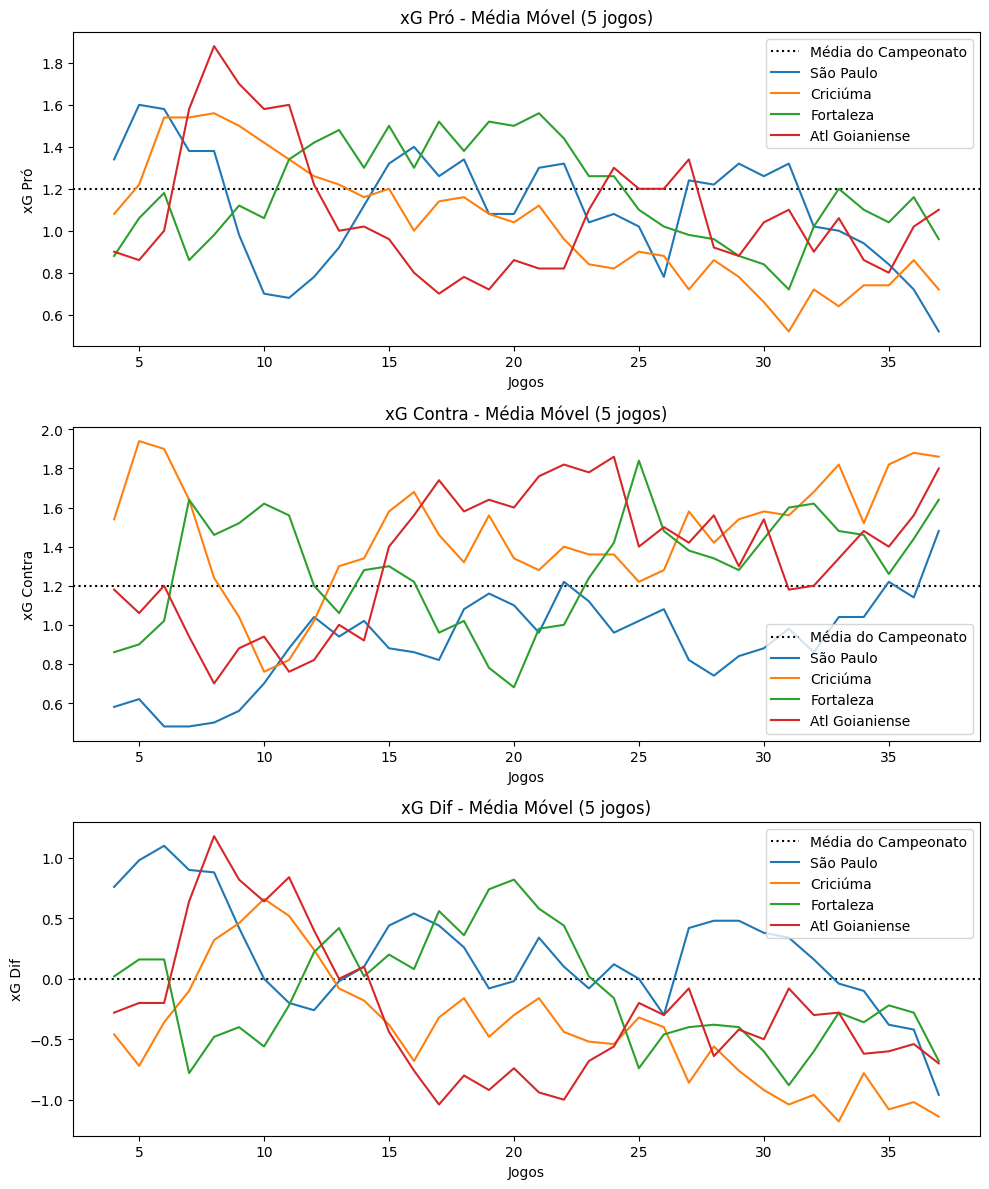

In [134]:
times_escolhidos = random.sample(list(movel.index), 4)

media_xg_pro = np.mean([np.mean(x) for x in xg_pro.values()])
media_xg_contra = np.mean([np.mean(x) for x in xg_contra.values()])
media_xg_dif = np.mean([np.mean(x) for x in xg_dif.values()])

estatisticas = ["xG Pró", "xG Contra", "xG Dif"]
valores = [xg_pro, xg_contra, xg_dif]
medias = [media_xg_pro, media_xg_contra, media_xg_dif]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, estatistica in enumerate(estatisticas):
    ax = axes[i]

    ax.axhline(medias[i], linestyle="dotted", color="black", label="Média do Campeonato")

    for time in times_escolhidos:
        serie_temporal = mediaMovel(valores[i][time], 5)
        ax.plot(serie_temporal, label=time)

    ax.set_title(f"{estatistica} - Média Móvel (5 jogos)")
    ax.legend()
    ax.set_xlabel("Jogos")
    ax.set_ylabel(estatistica)

plt.tight_layout()
plt.show()

O código seleciona 4 times aleatórios. No momento que escrevo esse texto, foram selecionados: Vasco da Game, Atlético Goianiense, Grêmio e Botafogo (RJ).

Isso facilita muito a análise, haja visto que Botafogo, Vasco, Grêmio e Atlético Goianiense terminaram o campeonato nessa ordem, com respectivamente 30, -13, -6 e -29 de saldo de gols, sendo o Botafogo o campeão do mesmo ano.

Sendo assim, fica claro o porque o Botafogo tem um grande xg_dif positivo, enquanto os outros ficaram abaixo da média do campeonato, o que não nescessariamente diz sobre o estilo de jogo, mas mais sobre a qualidade dos times.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [135]:
movel10 = pd.DataFrame()

for time in xg_pro:
    movel10.loc[time, 'xG Pró movel'] = mediaMovel(xg_pro[time], 10).iloc[-1]
    movel10.loc[time, 'xG Contra movel'] = mediaMovel(xg_contra[time], 10).iloc[-1]
    movel10.loc[time, 'xG Dif movel'] = mediaMovel(xg_dif[time], 10).iloc[-1]

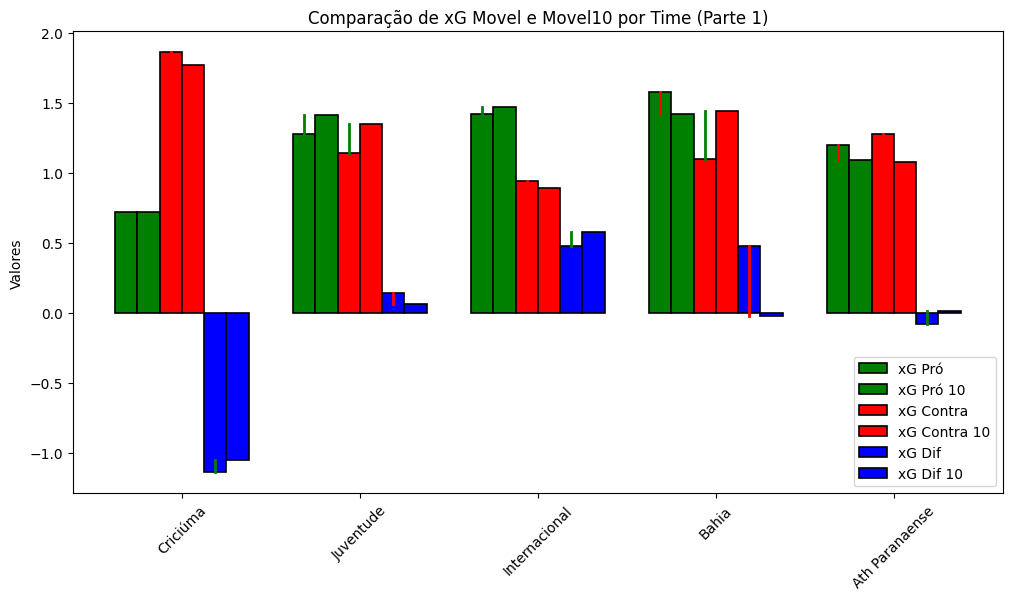

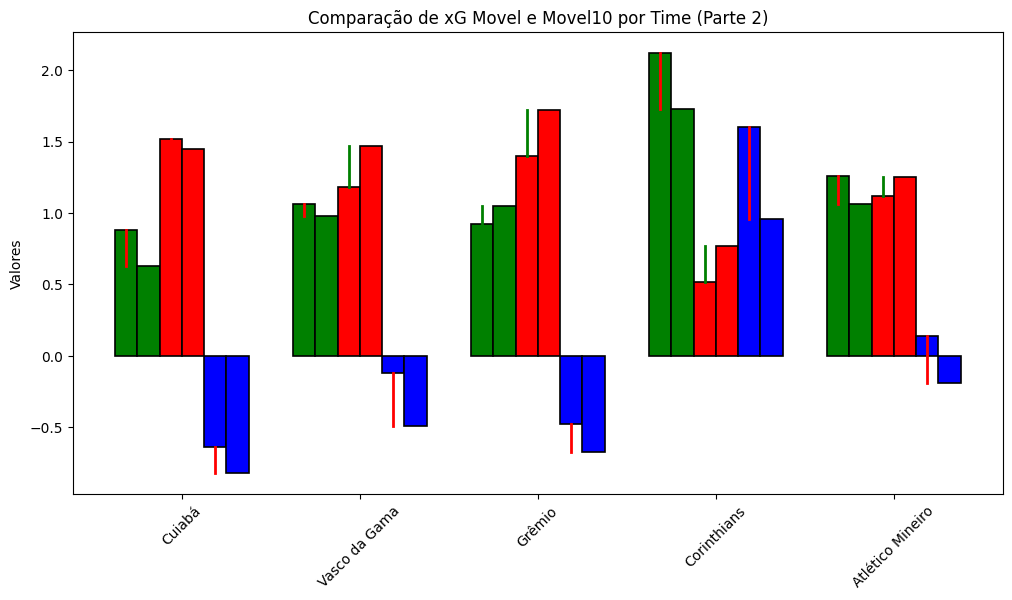

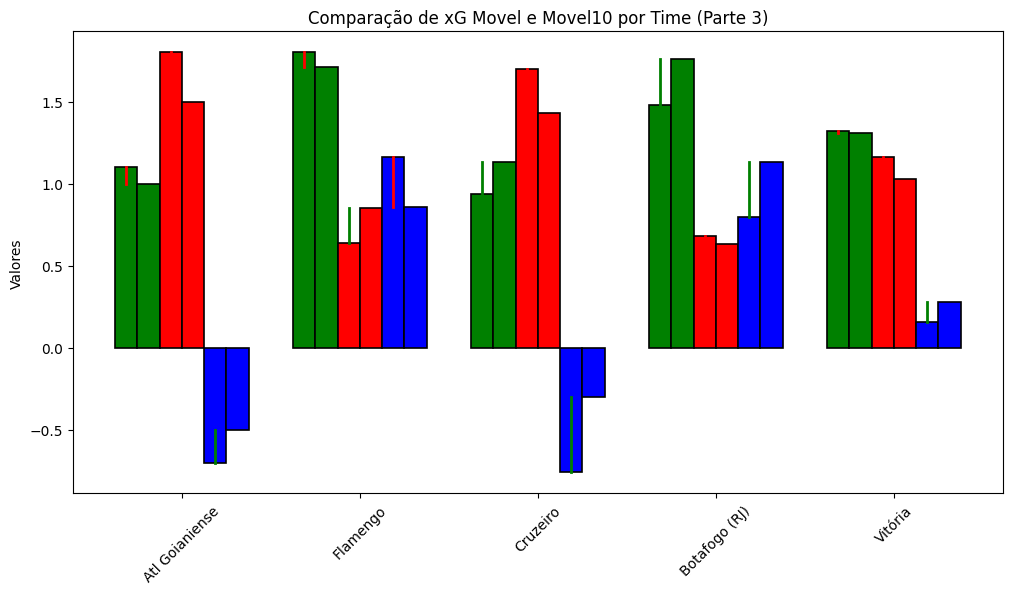

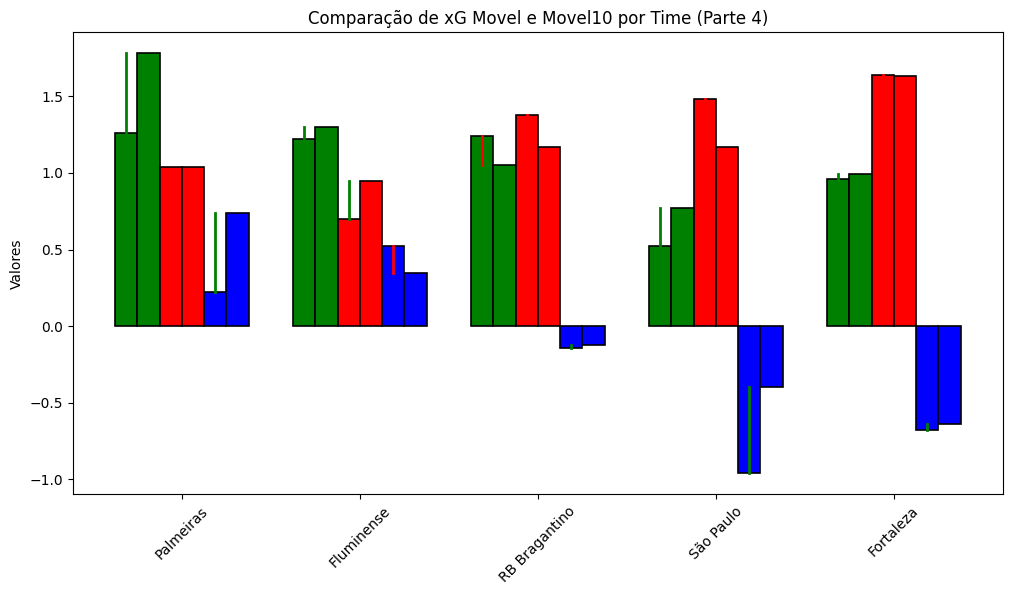

In [136]:
times_por_grafico = 5
times = movel.index.tolist()
num_graficos = (len(times) + times_por_grafico - 1) // times_por_grafico

valores = [
    movel["xG Pró movel"], movel10["xG Pró movel"],
    movel["xG Contra movel"], movel10["xG Contra movel"],
    movel["xG Dif movel"], movel10["xG Dif movel"]
]

cores = ["green", "green", "red", "red", "blue", "blue"]

largura = 0.15
margem = 0.3

for g in range(num_graficos):
    fig, ax = plt.subplots(figsize=(12, 6))

    times_subset = times[g * times_por_grafico: (g + 1) * times_por_grafico]
    x = np.arange(len(times_subset)) * (6 * largura + margem)

    for i in range(len(valores)):
        ax.bar(
            x + (i - 2.5) * largura, valores[i][times_subset], width=largura,
            color=cores[i], edgecolor="black", linewidth=1.2,
            label=f"{['xG Pró', 'xG Pró 10', 'xG Contra', 'xG Contra 10', 'xG Dif', 'xG Dif 10'][i]}" if g == 0 else "_nolegend_"
        )

    for i, time in enumerate(times_subset):
        for j in range(0, 6, 2):
            inicio = valores[j][time]
            fim = valores[j + 1][time]
            cor = "green" if fim >= inicio else "red"

            ax.plot([x[i] + (j - 2.5) * largura] * 2, [inicio, fim], color=cor, lw=2)

    ax.set_xticks(x)
    ax.set_xticklabels(times_subset, rotation=45)
    ax.set_ylabel("Valores")
    ax.set_title(f"Comparação de xG Movel e Movel10 por Time (Parte {g+1})")
    if g == 0:
        ax.legend()

    plt.show()

Fica claro que na média móvel de 10 jogos, em média , o xG Dif se aproxima muito mais do 0. Isso se dá por ser uma visão mais a longo prazo, o que aproxima os dados muito mais de uma distribuição gaussiana, por exemplo. Desse modo, a média móvel de 10 jogos é recomendada para planos de médio e longo prazo, como a definição do estilo de jogo do  time, enquanto que a média móvel de 5 jogos é preferencial para flutuações rápidas no jogo, como uma lesão ou uma recente contratação.

Para esta análise foram utilizados os últimos 5 jogos do campeonato para a média móvel de 5 jogos e os últimos 10 jogos para a média móvel de 10 jogos.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Leia o arquivo BR24PLAYERS.txt
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [137]:
def radar(df, parametros, cores):

  amostra = df.sample(3)[parametros]

  corTexto = ["white"] * 6

  max_range = [amostra[col].max() for col in amostra.columns[1:]]
  min_range = [amostra[col].min() for col in amostra.columns[1:]]

  for i in range(3):

    valores = amostra.iloc[i, 1:].copy()

    grafico = PyPizza(
        params=parametros[1:],
        min_range = min_range,
        max_range = max_range,
        straight_line_color = '#000000',
        straight_line_lw = 1,
        last_circle_lw = 1,
        other_circle_lw = 1,
        other_circle_ls = '-.'
        )

    fig, ax = grafico.make_pizza(
        valores,
        figsize = (10, 10),
        param_location=110,
        slice_colors=cores,
        value_colors = corTexto,
        value_bck_colors=cores,
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12, va="center"
        ),
        kwargs_values=dict(
            color="#000000", fontsize=12,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )

    texts = grafico.get_value_texts()
    for j, text in enumerate(texts):
        text.set_text(str(valores[j]))
    fig.text(
        0.515,
        0.97,
        amostra.iloc[i, 0],
        size=18,
        ha='center'
    )

    fig.text(
        0.515, 0.942,
        "Brasileirao | 2024",
        size=15,
        ha="center", color="#000000"
    )
    plt.show()

  return

<ipython-input-138-b617c1581ed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atacantes.rename(columns={'npxG.1': 'npxG90', 'xG.1': 'xG90', 'G-PK.1': 'G-PK90', 'npxG+xAG.1': 'npxG+xAG90'}, inplace=True)
/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

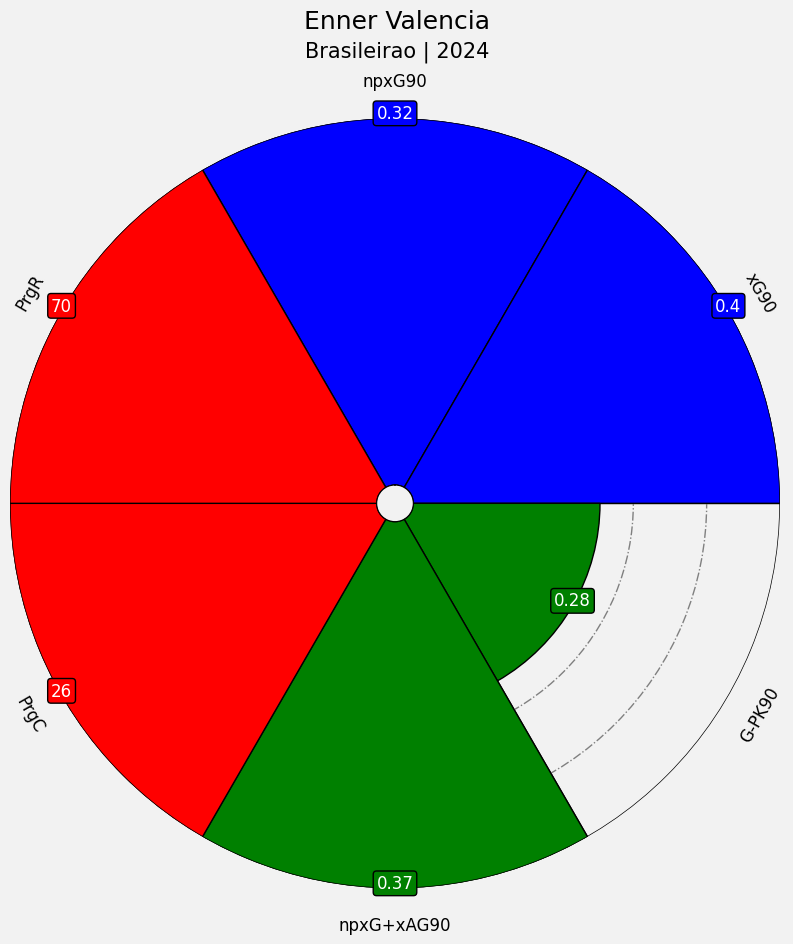

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


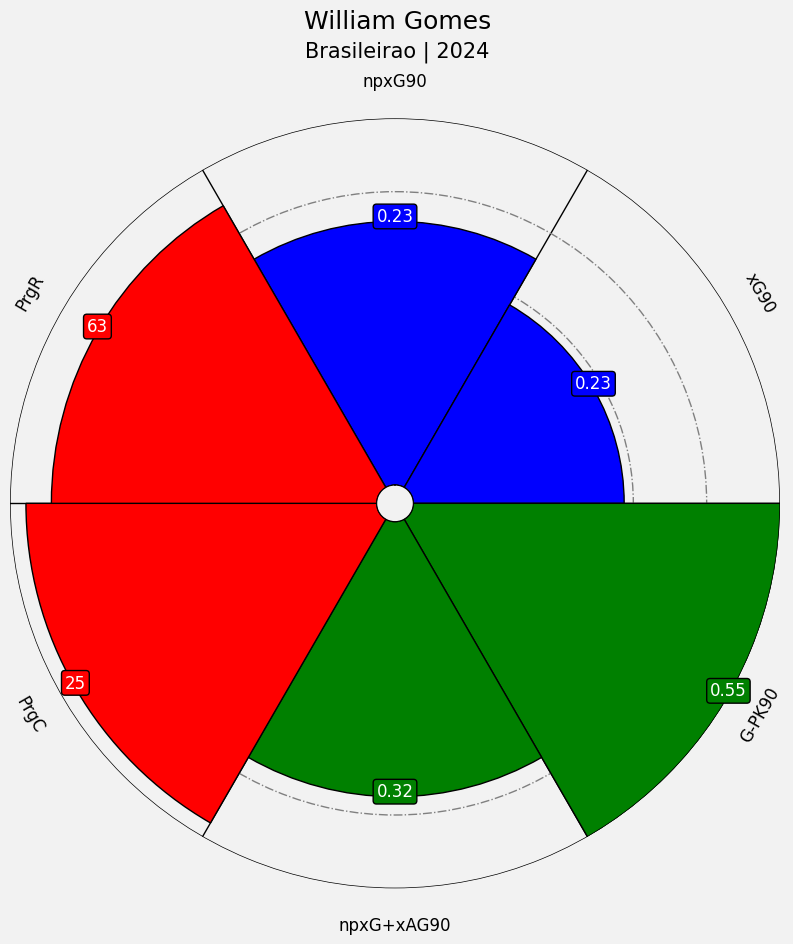

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


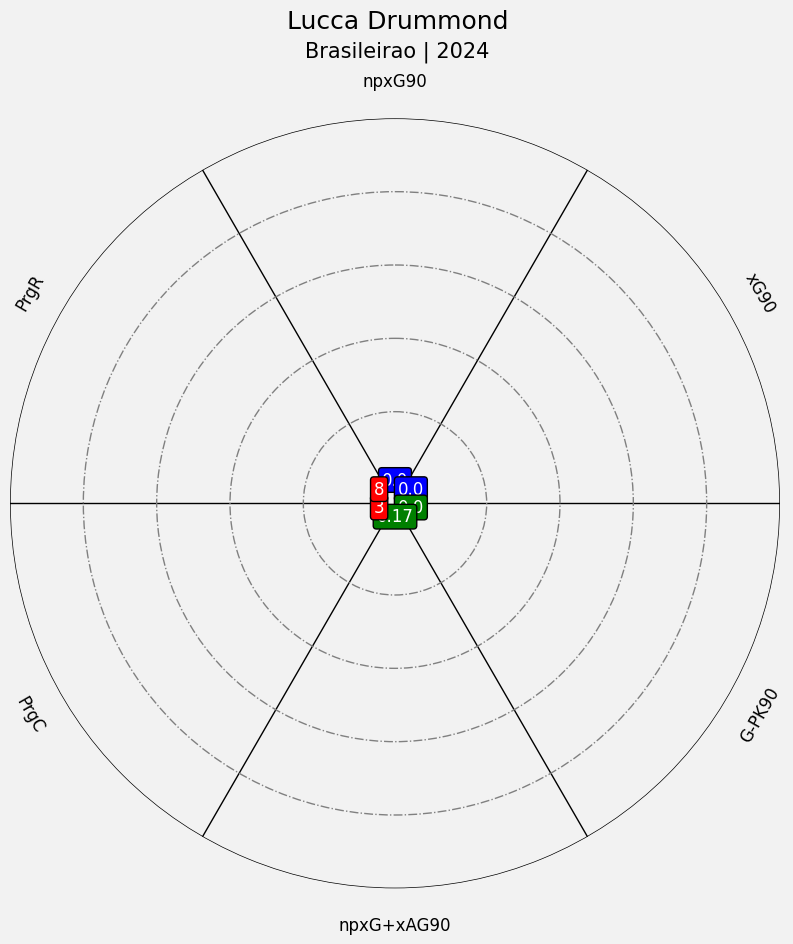

In [138]:
atacantes = jogadores[jogadores['Pos'].str.contains('FW', na=False)]
atacantes.rename(columns={'npxG.1': 'npxG90', 'xG.1': 'xG90', 'G-PK.1': 'G-PK90', 'npxG+xAG.1': 'npxG+xAG90'}, inplace=True)
parametros = ['Player', 'npxG90', 'xG90', 'G-PK90', 'npxG+xAG90', 'PrgC', 'PrgR']
corBarra = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
radar(atacantes, parametros, corBarra)

Como foi pedido uma análise entre os 3 atacantes, o menor e o maior valor entre os 3 foi definido como mínimo e máximo, respectivamente, para cada estatística.

Foram utilizados dados /90, ou seja, que consideram o valor por 90 minutos jogados, de modo que se tenha uma análise igualitária.

Por estarmos tratando de atacantes, foram selecionados dados de Carregas progressivas, PrgC, para analisar desenvolvimento e ofensividade, Recepção de passes progresivos, para analisar posicionamento e 4 diferentes dados referentes a xG, afinal estamos analisando atacantes.

O código escolhe 3 jogadores aleatórios, no momento dessa análise foram selecionados José López, Vágner Love e Carlos Alcaraz.

José López tem os maiores PrgC e PrgR, o que indica um jogador que constroí mais jogadas, em relação aos demais (Como há na tabela jogadores estiquetados como meia e atacante, casos assim acontecerão), apesar de de ter G-PK90 (gols por 90 minutos, excluindo penaltis) mediano e maior que seu xG90, o que pode nos indicar um jogador que atua mais de fora da área ou que infiltra pelas pontas.

Vágner Love é o 9 clássico, suas estatísticas referente a gols (xG90, npxG90, G-PK90 e npxG+xAG90) são as maiores entre os 3, enquanto possúi os menores dados de progressão.

Carlos Alcaraz fica muito atrás em quase todos índices, a não ser em PrgC, o que indica um jogador que ataca muito menos o gol, mas também pode ser fruto da sua curta passagem, o que aumenta a variância.


## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

<ipython-input-139-a26970f50374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meias.rename(columns={'npxG+xAG.1': 'npxG+xAG90', 'xAG.1': 'xA90'}, inplace=True)
/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valo

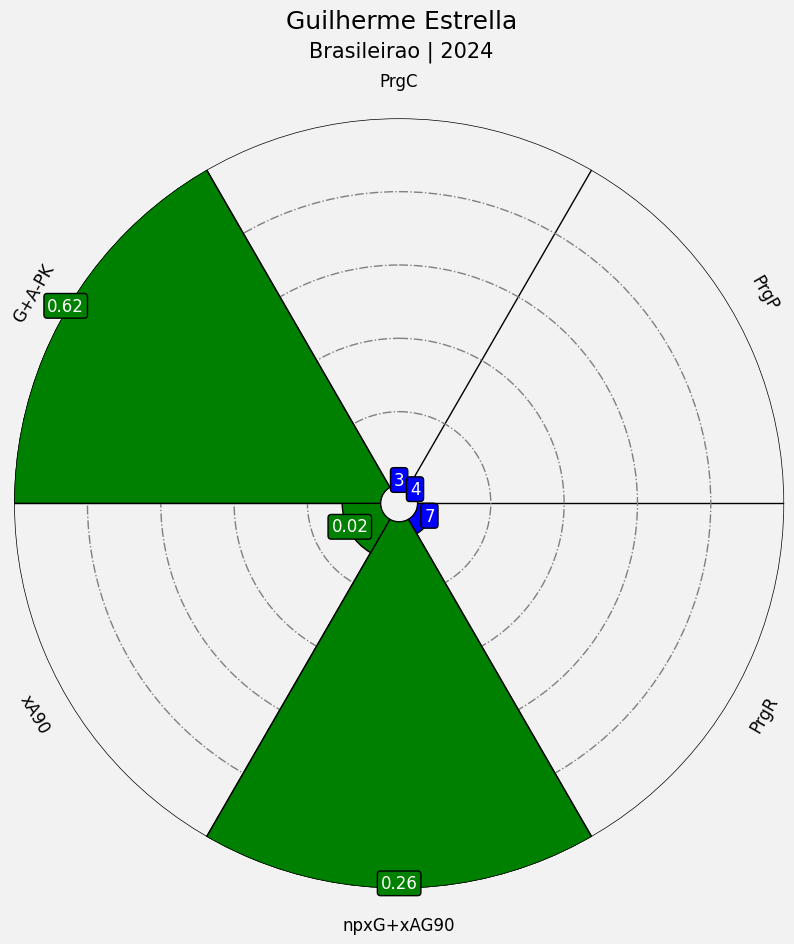

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


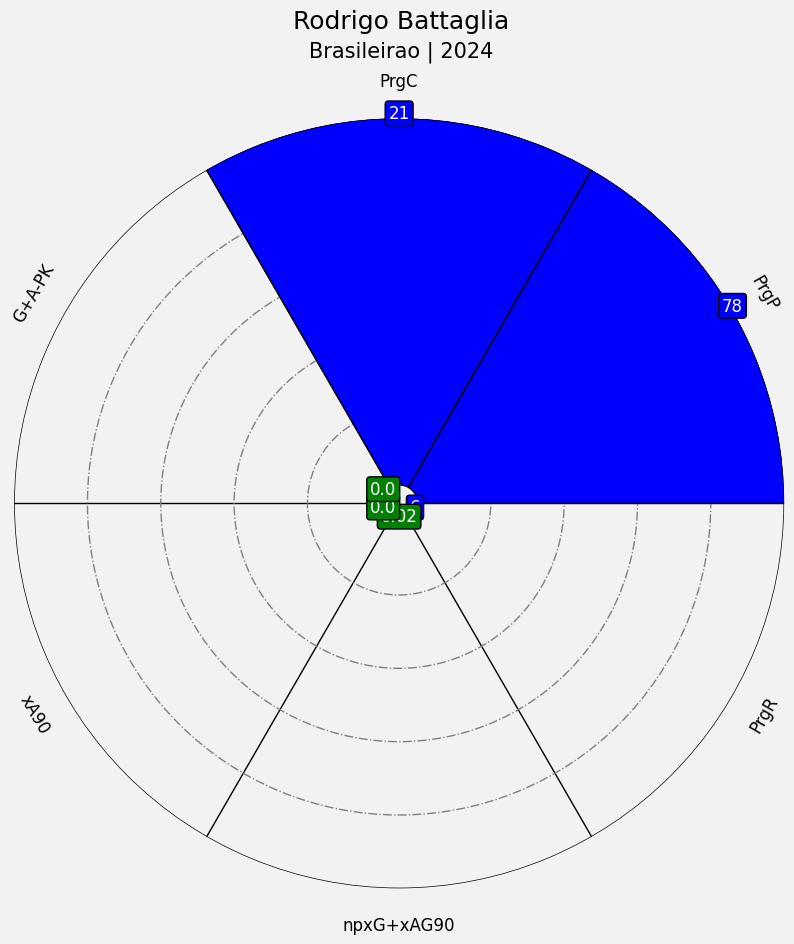

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


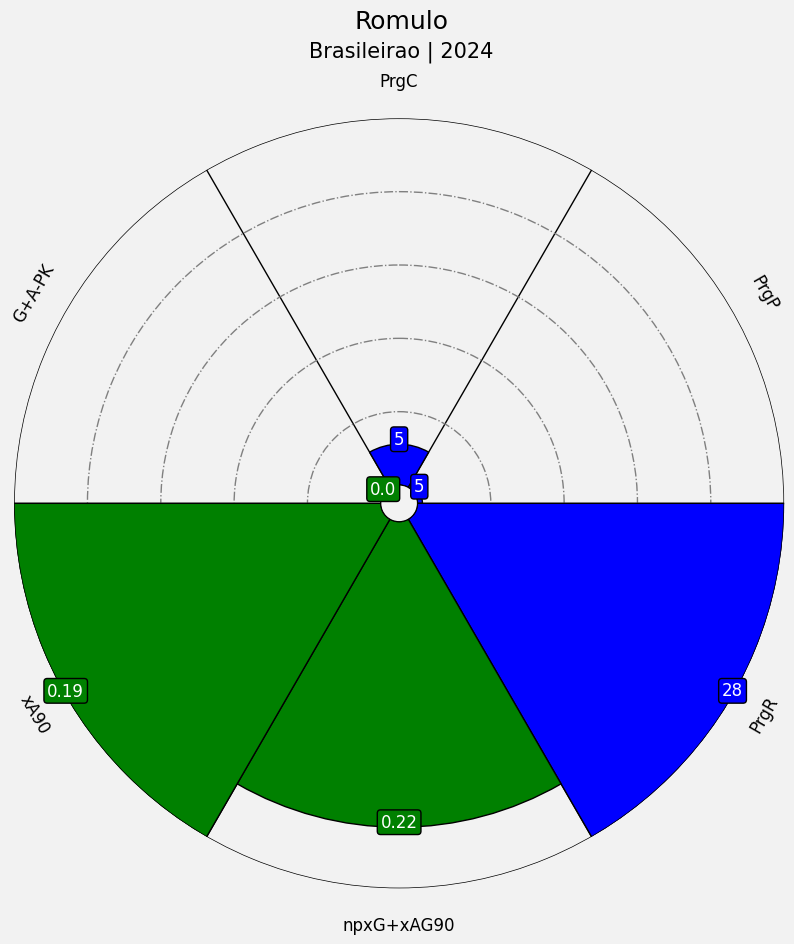

In [139]:
meias = jogadores[jogadores['Pos'].str.contains('MF', na=False)]
meias.rename(columns={'npxG+xAG.1': 'npxG+xAG90', 'xAG.1': 'xA90'}, inplace=True)
parametros = ['Player', 'PrgC', 'PrgP', 'PrgR', 'npxG+xAG90', 'xA90', 'G+A-PK']
cores = ["blue"] * 3 + ["green"] * 3
radar(meias, parametros, cores)

Foram selecionados dados de carregadas progressivas, PrgC, para analisar desenvolvimento e ofensividade, recepção de passes progresivos, para analisar posicionamento e passes progressivos, para analisar visão de jogo e qualidade de passe, além de 3 diferentes dados referentes a gols e assistências, com foco no último.

O código escolhe 3 jogadores aleatórios, no momento dessa análise foram selecionados Julimar, Higor Meritão e Igor Coronado.

Julimar possuí os maiores dados referentes a recepção e carregadas, juntamente com dados xG+xAG maiores relativamente à assistências isoladas. Isso demonstra um meia muito mais ofensivo e muito menos de criação, talvez um meia que ataca nas pontas ou um meia ofensivo que joga com um falso 9.

Higor Meritão tem as menores estatísticas entre os 3, provavelmente um jogador de elenco que joga eventualmente, o que torna difícil a análise.

Igor Coronado já é o oposto do Julimar com o PrgC e PrgP superiores ao PrgR e o xAG isolado maior que os outros, sendo mais um meia de criação, talvez um 10 clássico.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [140]:
def webscraping(link):
  df = pd.read_html(link, attrs = {"id": "matchlogs_all"})[0]
  df.columns = [col[1] for col in df.columns]

  df.dropna()
  df = df[df['Comp'] == 'Série A']
  df = df[['Min', 'Tkl', 'Int', 'Blocks']]

  tkl = 0
  inter = 0
  blocks = 0
  min = 0

  for _, line in df.iterrows():
    tkl_value = pd.to_numeric(line['Tkl'], errors='coerce')
    tkl += 0 if pd.isna(tkl_value) else tkl_value

    inter_value = pd.to_numeric(line['Int'], errors='coerce')
    inter += 0 if pd.isna(inter_value) else inter_value

    blocks_value = pd.to_numeric(line['Blocks'], errors='coerce')
    blocks += 0 if pd.isna(blocks_value) else blocks_value

    min_value = pd.to_numeric(line['Min'], errors='coerce')
    min += 0 if pd.isna(min_value) else min_value

  tkl = tkl / min
  inter = inter / min
  blocks = blocks / min

  return pd.DataFrame([[round(tkl, 3), round(inter, 3), round(blocks, 3)]], columns=['Tkl/min', 'Int/min', 'Blocks/min'])

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


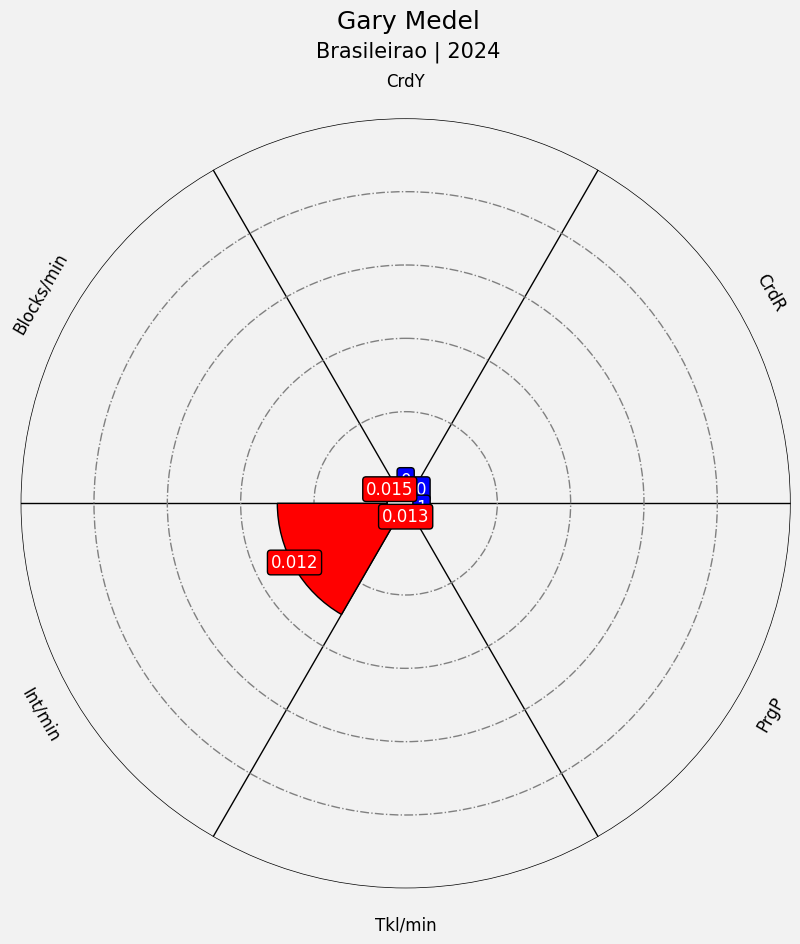

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


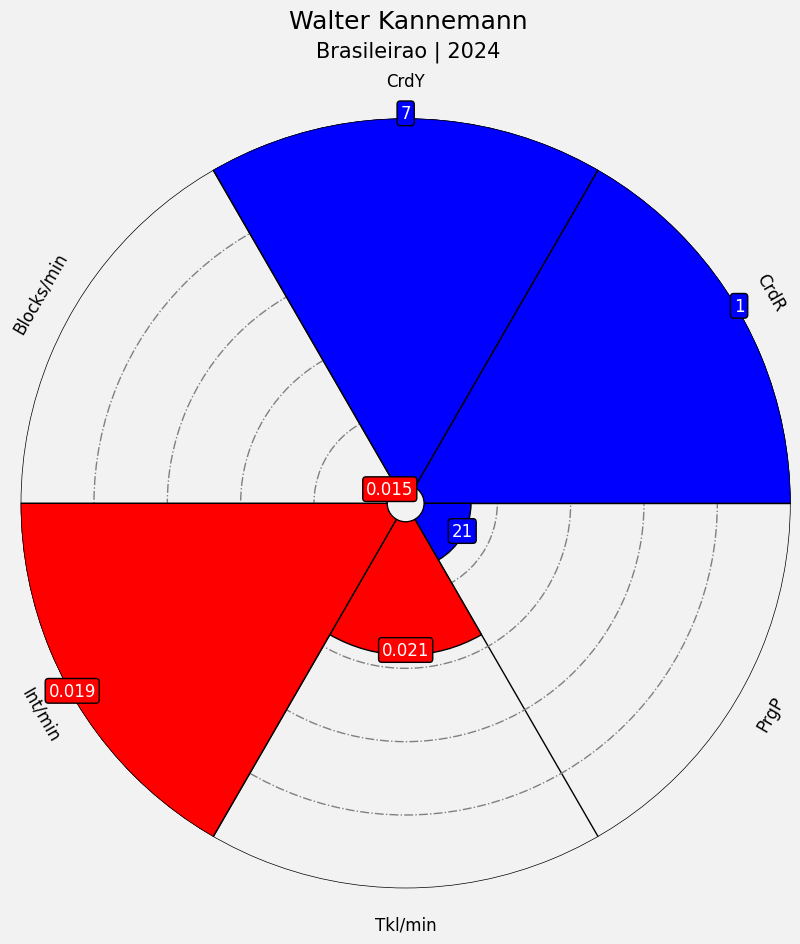

/usr/local/lib/python3.11/dist-packages/mplsoccer/py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values
<ipython-input-137-94d9da691983>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(str(valores[j]))


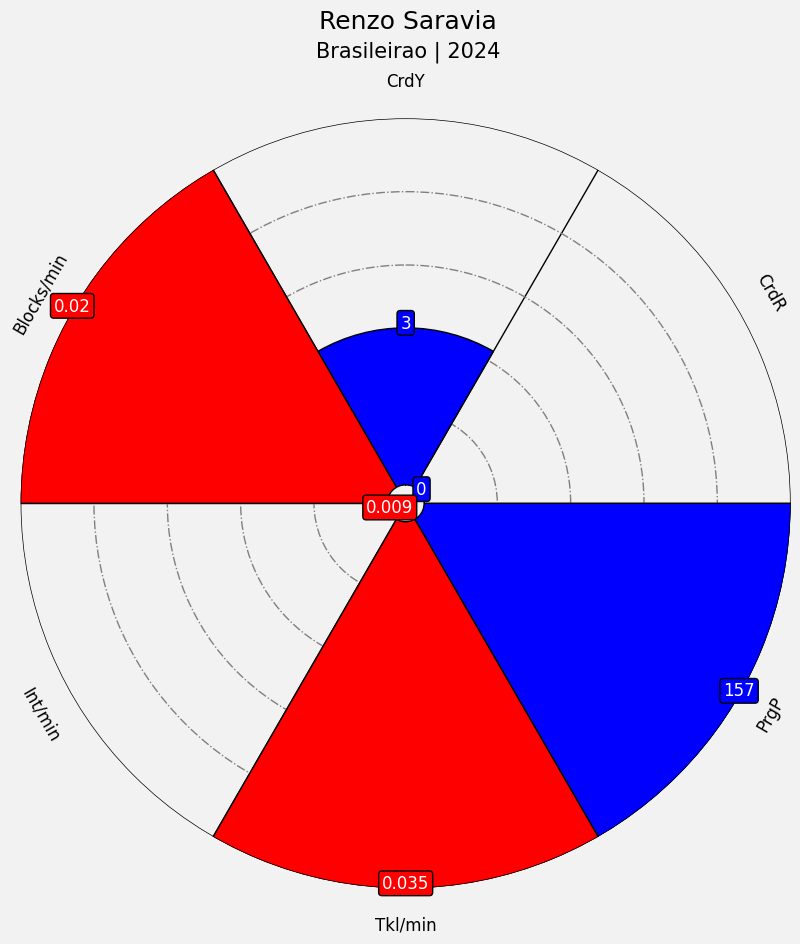

In [141]:
zaga = jogadores[jogadores['Pos'].str.contains('DF', na=False)]
parametros = ["Player", "CrdY", "CrdR", "PrgP"]

selec = zaga[zaga["Player"].isin(["Renzo Saravia", "Walter Kannemann", "Gary Medel"])]
selec = selec[parametros]

gary = webscraping("https://fbref.com/en/players/563a68ad/matchlogs/2023/Gary-Medel-Match-Logs")
renzo = webscraping("https://fbref.com/en/players/cf316639/matchlogs/2023/Renzo-Saravia-Match-Logs")
kannemann = webscraping("https://fbref.com/en/players/5b37f2f8/matchlogs/2023/Walter-Kannemann-Match-Logs")

gary["Player"] = 'Gary Medel'
renzo["Player"] = 'Renzo Saravia'
kannemann["Player"] = 'Walter Kannemann'

extra = pd.concat([gary, renzo, kannemann])
selec = pd.merge(selec, extra, on="Player")

parametros += ["Tkl/min", "Int/min", "Blocks/min"]

cores = ["blue"] * 3 + ["red"] * 3
radar(selec, parametros, cores)

Para zagueiros especificamente, a tabela não contém todos os dados nescessários, por tanto foi nescessário acessara outras tabelas.

O site não fornece um dowload das tabelas (pelo menos que eu tenha encontrado) e os links gerados possuem um código aparentemente aleatório. É importante mencionar isso porque foi feito um webscraping manual, por tanto, os jogadores dessa análise foram selecionados aleatoriamente, porém não é possível repetir o processo em código, a não ser que se modifique manualmente os links.

As métricas utilizadas foram: Interceptações por minuto, Roubos por minuto, Bloqueios por minutos, Passes progressivos, Cartões amarelos e Cartões vermelhos.

Saraiva tem o maior número de roubos de bola, bloqueios e passes progressivos, senod provavelmente o melhor defensor entre os 3.

Kannemann é o maior interceptador, ams também é o que mais recebeu cartões, demonstrando um estilo muito agressivo que é injustificável em relação a sua eficiência de marcação e roubada de bolas.

Gary Medel, provavelmente não é um defensor titular dado que apresenta métricas muito abaixo aos outros.


## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

Obviamente, para cada posição, estatísticas diferentes serão utilizadas. Como foram utilizados jogadores aleatórios, nem todos eu conhecia, ainda mais ter uma impressão pré-estabelecida, apesar de saber que o Kannemann bate muito, o Vagner Love ser um 9 "cone" (ainda mais pela idade) e o Coronado ser mais voltado para criação.

Claramente o radar mais difícil de ser realizado foi o de zagueiros, o que fica claro com a nescessidade de realizar webscraping em outras tabelas. Isso já era esperado, afinal os dados são do futebol são muito mais focados no ataque e que é evidenciado pelo fato de não ter questão para criar radares de goleiros.